In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/samsung-mobiles-latest-dataset/samsung_mobile_new_data.csv
/kaggle/input/samsung-mobiles-latest-dataset/samsungMobilesData.csv


In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

In [147]:
df=pd.read_csv("/kaggle/input/samsung-mobiles-latest-dataset/samsungMobilesData.csv")
df


,name,ratings,price,imgURL,camera,display,battery,storage,ram,processor,android_version
0,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB)",4.3,9499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,64,4,not mentioned,12
1,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
2,"SAMSUNG Galaxy F13 (Nightsky Green, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
3,"SAMSUNG Galaxy F13 (Sunrise Copper, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
4,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4.3,15499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,5000,128,6,Snapdragon750GProcessor,12
...,...,...,...,...,...,...,...,...,...,...,...
402,"SAMSUNG Galaxy M40 (Seawater Blue, 128 GB)",4.5,21490,https://rukminim2.flixcart.com/image/312/312/k...,32,other_types,3500,128,6,not mentioned,9
403,"SAMSUNG Galaxy A30s (Prism Crush Violet, 64 GB)",4.3,16199,https://rukminim2.flixcart.com/image/312/312/k...,25,other_types,4000,64,4,not mentioned,12
404,"SAMSUNG Galaxy J4 Plus (Black, 32 GB)",4.4,9000,https://rukminim2.flixcart.com/image/312/312/j...,13,other_types,3300,32,2,Snapdragon425P,8
405,"SAMSUNG Galaxy M01s (Gray, 32 GB)",4.2,10999,https://rukminim2.flixcart.com/image/312/312/k...,13,other_types,4000,32,3,MediaTek,9


In [3]:
df.shape

(407, 11)

In [4]:
df.isnull().sum()

name               0
ratings            0
price              0
imgURL             0
camera             0
display            0
battery            0
storage            0
ram                0
processor          0
android_version    0
dtype: int64

# first thing first ,Data Analysis

In [19]:
# now we clearly see first there is mobile name and then its specifications so we remove the first name
df['name'] = df['name'].str.replace("SAMSUNG Galaxy","")
df.head()

,name,ratings,price,imgURL,camera,display,battery,storage,ram,processor,android_version
0,"F13 (Sunrise Copper, 64 GB)",4.3,9499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,64,4,not mentioned,12
1,"F13 (Waterfall Blue, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
2,"F13 (Nightsky Green, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
3,"F13 (Sunrise Copper, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
4,"F23 5G (Aqua Blue, 128 GB)",4.3,15499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,5000,128,6,Snapdragon750GProcessor,12


In [32]:
# now we show top n(5) mobiles 
most_repeated_phones = df['name'].value_counts()
most_repeated_phones_values = most_repeated_phones.head(5)
most_repeated_phones_top = most_repeated_phones_values.values
most_repeated_phones_labels = most_repeated_phones_values.index
most_repeated_phones_labels

Index([' A12 (Blue, 128 GB)', ' M32 5G (Sky Blue, 128 GB)',
       ' M34 5G without charger (Prism Silver, 128 GB)',
       ' A22 5G (Gray, 128 GB)', ' M32 5G (Slate Black, 128 GB)'],
      dtype='object')

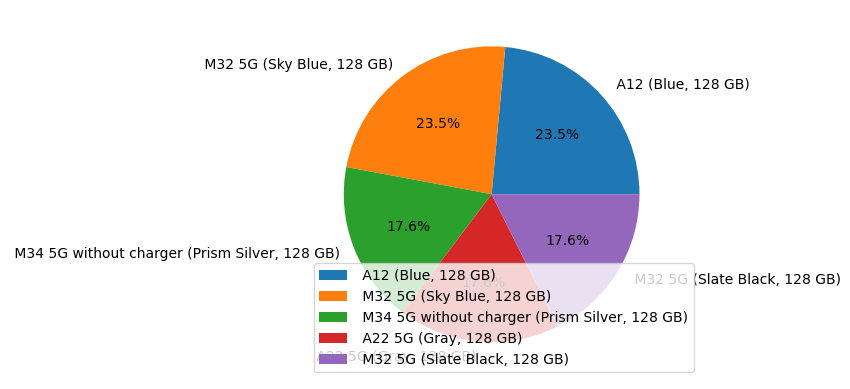

In [35]:
plt.pie(most_repeated_phones_top,labels=most_repeated_phones_labels,autopct="%1.1f%%")
plt.legend(loc='lower left')
plt.show()

<Axes: xlabel='android_version', ylabel='count'>

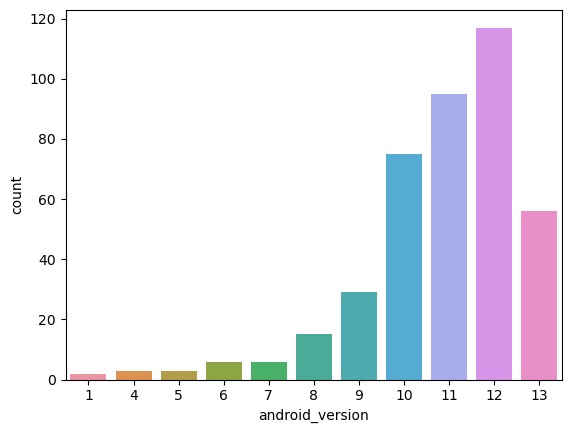

In [36]:
# count plot for android version
sns.countplot(x='android_version',data=df)

<Axes: xlabel='ram', ylabel='count'>

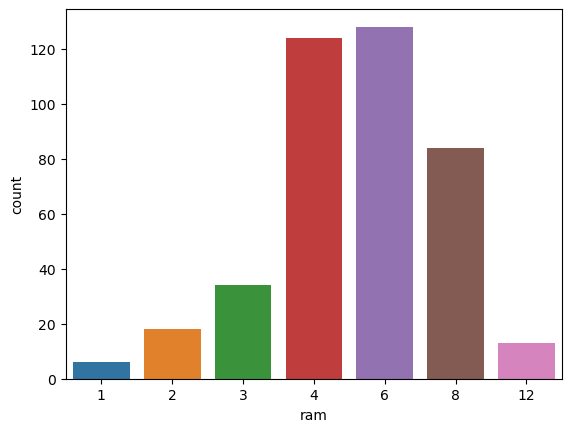

In [40]:
# count plot for ram
sns.countplot(x='ram',data=df)

<Axes: xlabel='battery', ylabel='count'>

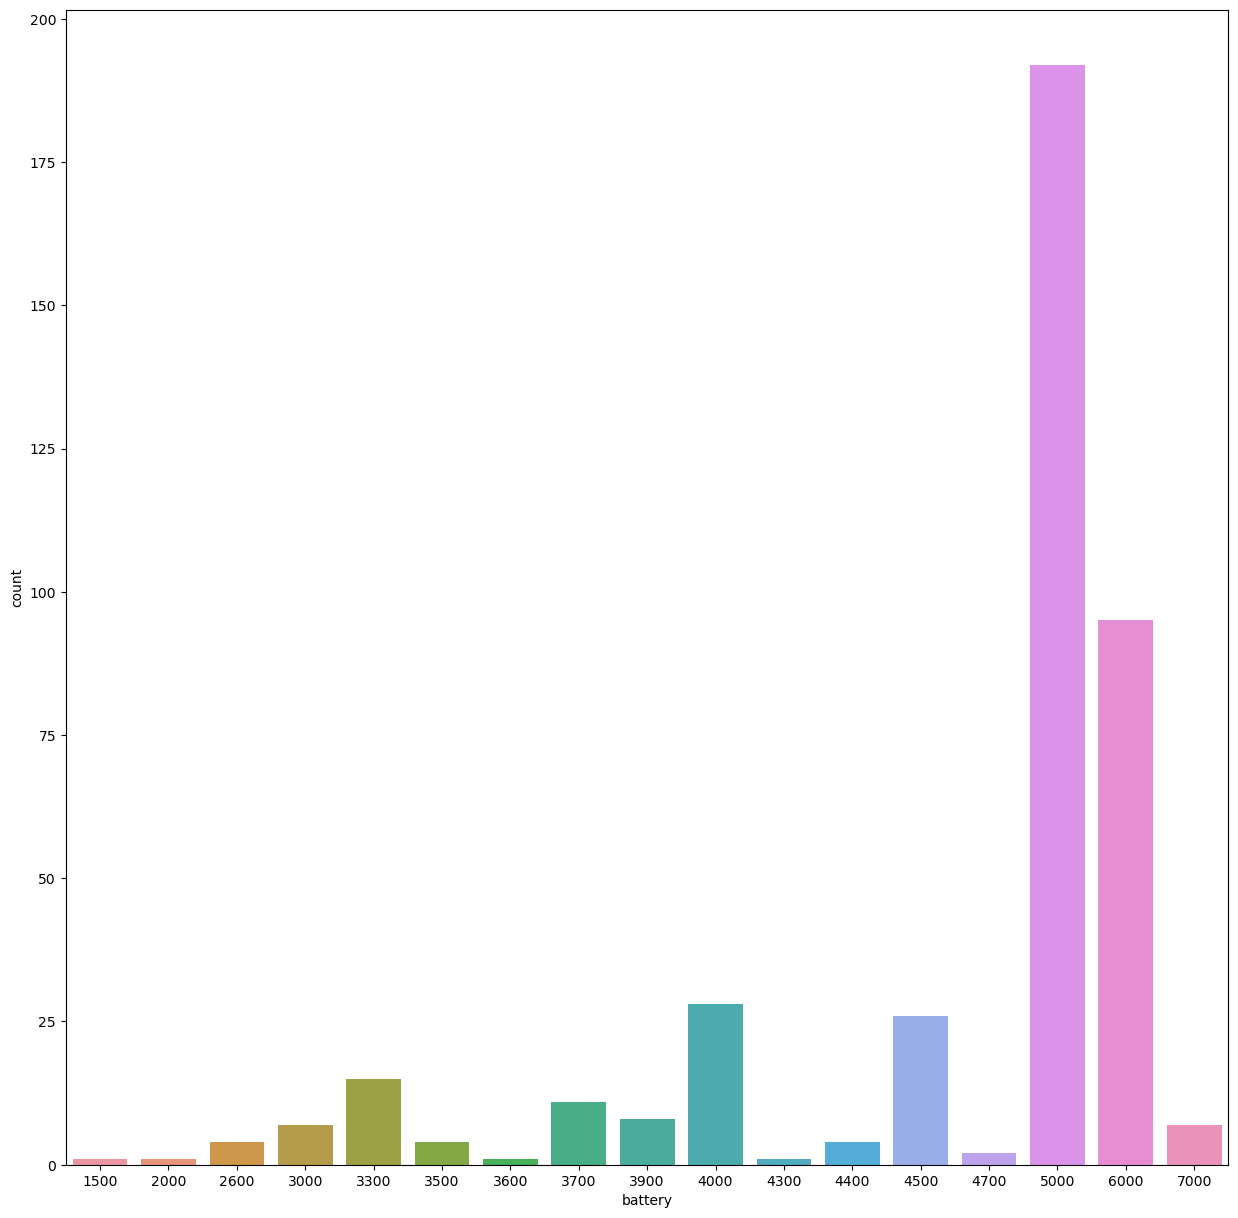

In [39]:
# count plot for battery
plt.figure(figsize=(15,15))
sns.countplot(x='battery',data=df)

<Axes: xlabel='camera', ylabel='count'>

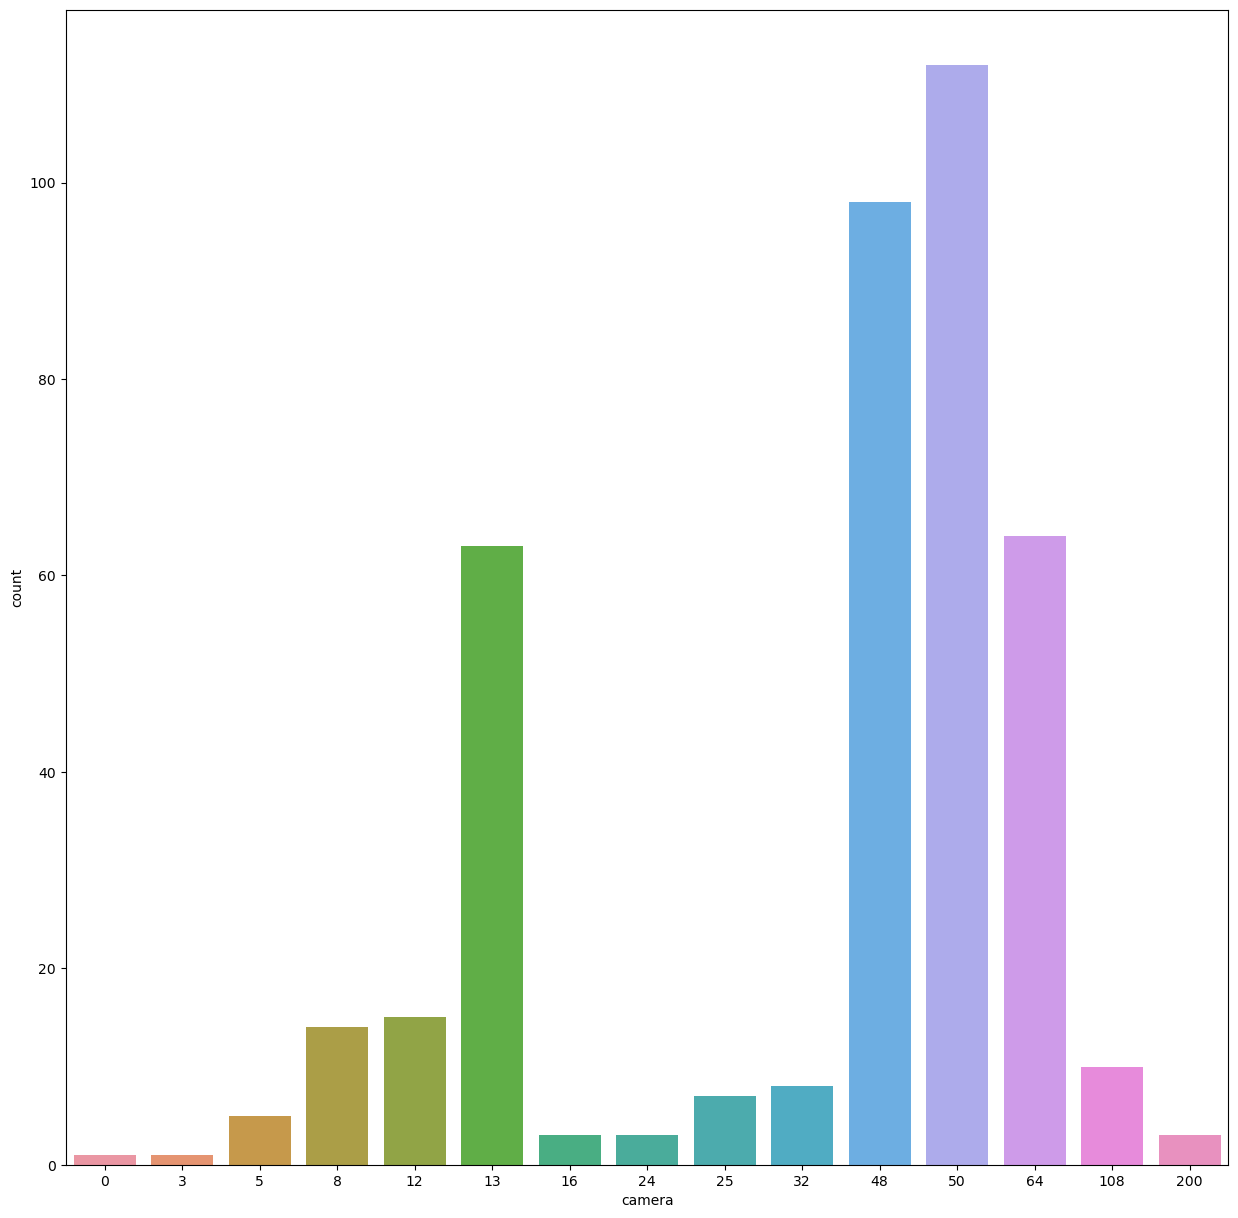

In [70]:
# count plot for battery
plt.figure(figsize=(15,15))
sns.countplot(x='camera',data=df)

Text(0.5, 1.0, 'scatter plot of RAM and storage')

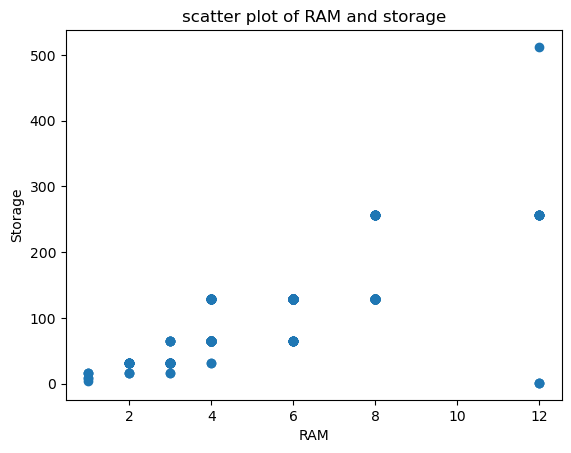

In [42]:
plt.scatter(df['ram'],df['storage'])
plt.xlabel("RAM")
plt.ylabel("Storage")
plt.title("scatter plot of RAM and storage")

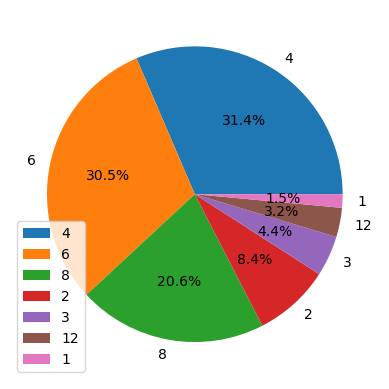

In [48]:
plt.pie(df['ram'].value_counts(),labels=df['ram'].unique(),autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.show()

In [47]:
df['ram'].unique()

array([ 4,  6,  8,  2,  3, 12,  1])

In [68]:
b=df.sort_values(by='price',ascending=True)[['name','price']]
b=b.groupby('name')['price'].sum().reset_index().head(10)
b.head(20)

,name,price
0,"A03 (Black, 32 GB)",9400
1,"A03 (Blue, 32 GB)",8991
2,"A03 (Blue, 64 GB)",11499
3,"A03 (Red, 32 GB)",18996
4,"A03 Core (Black, 32 GB)",7189
5,"A03 Core (Blue, 32 GB)",8150
6,"A03 Core (Bronze, 32 GB)",7199
7,"A03 Core (Green, 32 GB)",16806
8,"A03 Core (Mint, 32 GB)",7199
9,"A03 Core (Onyx, 32 GB)",6990


In [67]:
b.groupby('name')['price'].sum().reset_index().head(10)

,name,price
0,"A03 (Black, 32 GB)",9400
1,"A03 (Blue, 32 GB)",8991
2,"A03 (Blue, 64 GB)",11499
3,"A03 (Red, 32 GB)",18996
4,"A03 Core (Black, 32 GB)",7189
5,"A03 Core (Blue, 32 GB)",8150
6,"A03 Core (Bronze, 32 GB)",7199
7,"A03 Core (Green, 32 GB)",16806
8,"A03 Core (Mint, 32 GB)",7199
9,"A03 Core (Onyx, 32 GB)",6990


<Axes: xlabel='name', ylabel='price'>

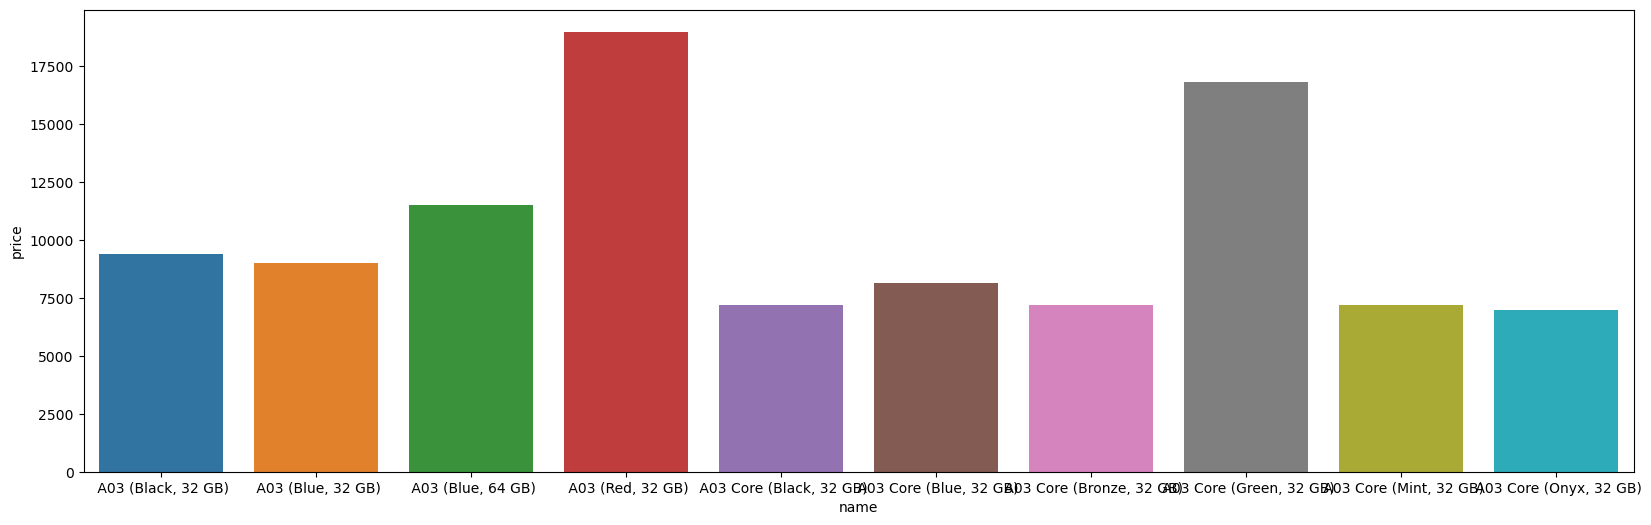

In [69]:
plt.figure(figsize=(20,6))
sns.barplot(x='name',y='price',data=b)

# now we predict mobile price

In [112]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [74]:
df.head()

,name,ratings,price,imgURL,camera,display,battery,storage,ram,processor,android_version
0,"F13 (Sunrise Copper, 64 GB)",4.3,9499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,64,4,not mentioned,12
1,"F13 (Waterfall Blue, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
2,"F13 (Nightsky Green, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
3,"F13 (Sunrise Copper, 128 GB)",4.3,10499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,6000,128,4,not mentioned,12
4,"F23 5G (Aqua Blue, 128 GB)",4.3,15499,https://rukminim2.flixcart.com/image/312/312/x...,50,other_types,5000,128,6,Snapdragon750GProcessor,12


In [148]:
# we know we dont need to column imageurl and ratting for prediction its price
# we also  drop processor and disply because these teo have null values in 
df.drop(['imgURL','ratings','processor','display','name'],axis=1,inplace=True)

In [149]:
df.head()

,price,camera,battery,storage,ram,android_version
0,9499,50,6000,64,4,12
1,10499,50,6000,128,4,12
2,10499,50,6000,128,4,12
3,10499,50,6000,128,4,12
4,15499,50,5000,128,6,12


In [150]:
X=df.drop(['price'],axis=1)
y=df['price']

In [151]:
# now we do scalling on our data
mms=MinMaxScaler()
X_mms=mms.fit_transform(X)
X_mms

array([[0.25      , 0.81818182, 0.12328767, 0.27272727, 0.91666667],
       [0.25      , 0.81818182, 0.24853229, 0.27272727, 0.91666667],
       [0.25      , 0.81818182, 0.24853229, 0.27272727, 0.91666667],
       ...,
       [0.065     , 0.32727273, 0.06066536, 0.09090909, 0.58333333],
       [0.065     , 0.45454545, 0.06066536, 0.18181818, 0.66666667],
       [0.25      , 0.4       , 0.24853229, 0.63636364, 0.91666667]])

In [152]:
#Performing train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_mms,y,test_size=0.2,random_state=0)

In [153]:
#model building using Multiple regression
mlr=LinearRegression()
mlr.fit(X_train,y_train)
y_pred=mlr.predict(X_test)

In [155]:
# now we calculate MAE,MSE,RMSE,R2-Score of multiple regression
print("mean absolute error:",mean_absolute_error(y_test,y_pred))
print("mean squared error:",mean_squared_error(y_test,y_pred))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2-score:",r2_score(y_test,y_pred))

mean absolute error: 4126.772848357044
mean squared error: 33767042.39153206
root mean squared error: 5810.941609716283
r2-score: 0.31063385084862316


In [156]:
#model building using Random forest regresser
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)

In [157]:
# now we calculate MAE,MSE,RMSE,R2-Score of Random forest regressor
print("mean absolute error:",mean_absolute_error(y_test,y_pred))
print("mean squared error:",mean_squared_error(y_test,y_pred))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2-score:",r2_score(y_test,y_pred))

mean absolute error: 2837.0604777851977
mean squared error: 18275365.789577648
root mean squared error: 4274.969682884038
r2-score: 0.6269019242901378


## now we clearly see RFR performing better then Multiple Regression so we make predriction using RFR


In [161]:
df.head()

,price,camera,battery,storage,ram,android_version
0,9499,50,6000,64,4,12
1,10499,50,6000,128,4,12
2,10499,50,6000,128,4,12
3,10499,50,6000,128,4,12
4,15499,50,5000,128,6,12


In [170]:
prediction=rfr.predict(mms.transform([[500,5000,128,12,12]]))
prediction

array([24138.91473016])